# Análise exploratória de dados

## 1. Resumo

O objetivo principal deste documento é criar visualizações que auxiliem na obtenção de insights a respeito dos dados disponíveis. Para tal, inicialmente foi realizada uma descrição do conjunto ded ados, posteriormente um tratamento e, por fim, foram realizadas visualiações sobre as variáveis, cada uma dela com anotações que podem ajudar na tarefa de modelagem.

O restante do documento contém combinações de células de texto e código que auxiliam no entendimento dos dados.

## 2. Implementação

### 2.1 Importação de bibliotecas e configurações

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from src.data import visualize

colors = ["#00853B", "#FEBD01"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

### 2.2 Carregamento do conjunto de dados

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 2.1 Análise de variáveis

Para uma visão geral das variáveis, utilizaremos o método `.info()`. Através do seu uso, saberemos a quantidade de valores não nulos e o tipo de cada variável.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Podemos então criar variáveis para armazenar separadamente cada grupo de variáveis

In [4]:
target_variable = 'species'
nominal_variables = ['species', 'islands', 'sex']
quantitative_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

Depois dessa definição, podemos entender melhor as variáveis envolvidas, qual o significado e tipo delas.

| Variável | Descrição | Tipo | Possíveis valores / Unidade |
|:--|:--|:--|:--|
| `species` | Um fator denotando a espécie do pinguin | `Nominal`  | `[Adélie, Chinstrap, Gentoo]` |
| `island` | Um fator denotando a ilha no arquipélago Palmer, Antarctica | `Nominal` | `[Biscoe, Dream, Torgersen]` | 
| `bill_length_mm` | Um número denotando o comprimento do bico | `Quantitativa` | `milímetros` | 
| `bill_depth_mm` | Um número denotando a profundidade do bico | `Quantitativa` | `milímetros` |
| `flipper_length_mm` | Um número denotando o comprimento da nadadeira | `Quantitativa` | `minlímetros` |
| `body_mass_g` | Um número denotando a massa do pinguin | `Quantitativa` | `gramas` | 
| `sex` | Um fator denotando o sexo do pingun | `Nominal` | `[female, male]` |

### Dados faltantes

Para uma melhor visualização, utilizaremos um gráfico de barra para verificar o comportamento dos dados faltantes sobre as variáveis.

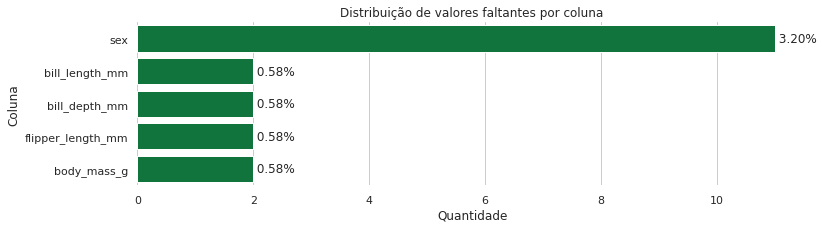

In [5]:
missing_data_size = df.isnull().sum()
missing_data_columns = (
    (
        missing_data_size[missing_data_size > 0]
    )
    .sort_values(ascending=False)
    .to_frame(name='Quantidade')
)
missing_data_columns = missing_data_columns.assign(Coluna=missing_data_columns.index).reset_index(drop=True)

plt.figure(figsize=(12, 3))
ax = sns.barplot(data=missing_data_columns, x='Quantidade', y='Coluna', color="#00853B")
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f" {i:.2f}%" for i in missing_data_columns.Quantidade.astype(int) / len(df) * 100])
plt.title("Distribuição de valores faltantes por coluna")
plt.show()

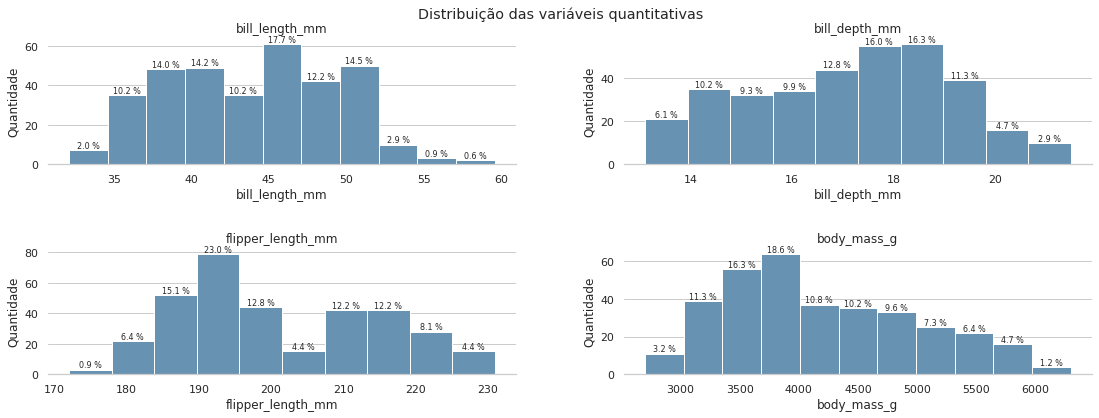

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16,6))
plt.tight_layout(pad=3, w_pad=6, h_pad=5)
plt.suptitle('Distribuição das variáveis quantitativas')

for i, variable in enumerate(quantitative_variables):
    visualize.histogram(df, variable, axes.flatten()[i])
plt.show()

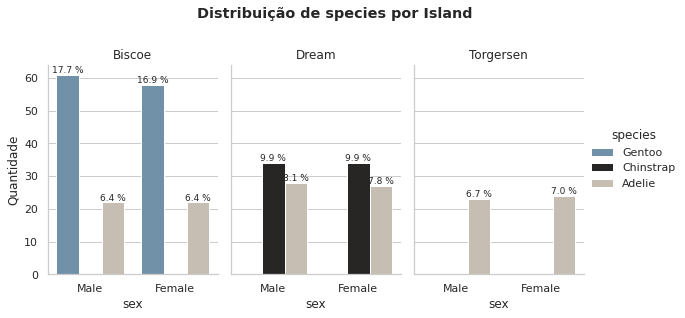

In [7]:
visualize.group_graph(df, ['species', 'sex', 'island'])

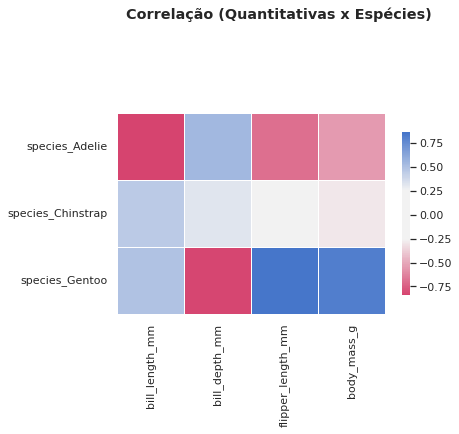

In [17]:
query_data = (
    df.join(
        pd
        .get_dummies(df[target_variable], target_variable)
    )
)

output_vars = [f"{target_variable}_{specie}" for specie in df.species.unique()]

visualize.correlation_between(
    query_data,
    output_vars,
    quantitative_variables,
    'Quantitativas x Espécies'
) 

In [10]:
target_variable

'species'